In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from PIL import Image
import scipy.ndimage as ndi
import pandas as pd
import numpy as np


In [3]:
# We have 3 images 
pavlos_img_ptr = np.array(Image.open("pavlos.jpeg"))
notpavlos_img_ptr = np.array(Image.open("not-pavlos.jpeg"))
notpavlos2_img_ptr = np.array(Image.open("not-pavlos2.jpg"))

def img_resize(imgs_in, factor):
    imgs_out_train = ndi.zoom(imgs_in, (1, factor, factor, 1), order=2)
    return imgs_out_train
    

#Reduce image size to 100x100
#train
SIZE=100
pavlos_img_ptr = pavlos_img_ptr[:,:,2].reshape(1,150,150,1)
pavlos_img_ptr = img_resize(pavlos_img_ptr, SIZE/pavlos_img_ptr.shape[1])
pavlos_img_nice = pavlos_img_ptr

 
notpavlos_img_ptr = notpavlos_img_ptr[:,:,2].reshape(1,132,132,1)
notpavlos_img_ptr = img_resize(notpavlos_img_ptr,SIZE/notpavlos_img_ptr.shape[1])
notpavlos_img_nice = notpavlos_img_ptr

 
notpavlos2_img_ptr = notpavlos2_img_ptr[:,:,2].reshape(1,100,100,1)
notpavlos2_img_ptr = img_resize(notpavlos2_img_ptr, SIZE/notpavlos2_img_ptr.shape[1])
notpavlos2_img_nice  = notpavlos2_img_ptr



In [4]:
pavlos_flatten = pavlos_img_nice.reshape(100*100,1)
print(pavlos_flatten.shape)

notpavlos_flatten = notpavlos_img_nice.reshape(100*100,1)
print(notpavlos_flatten.shape)

notpavlos2_flatten = notpavlos2_img_nice.reshape(100*100,1)
print(notpavlos2_flatten.shape)

(10000, 1)
(10000, 1)
(10000, 1)


### Create model and train

In [5]:
### edTest(test_check) ###
# create an AE and fit it with our data using 8 neurons in the dense layer using keras' functional API

input_dim = pavlos_flatten.shape[0]
encoding_dim = 8 

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear', use_bias=True)(input_layer)
encoder = Model(input_layer, encoded, name='simpleenc' )


# Decoder
latent_input = Input(shape=(encoding_dim,))
decoded = Dense(input_dim, activation='linear', use_bias=True)(latent_input)
decoder = Model(latent_input, decoded, name='ldec')

autoencoder = Sequential(name='AE')
autoencoder.add(encoder)
autoencoder.add(decoder)
autoencoder.compile(loss='mse', optimizer=Adam(lr=0.001))

autoencoder.summary()


history = autoencoder.fit(pavlos_flatten.reshape(-1,input_dim), pavlos_flatten.reshape(-1,input_dim),
                epochs=100,
                batch_size=1000,
                shuffle=True,
                verbose = 1)

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simpleenc (Model)            (None, 8)                 80008     
_________________________________________________________________
ldec (Model)                 (None, 10000)             90000     
Total params: 170,008
Trainable params: 170,008
Non-trainable params: 0
_________________________________________________________________
Train on 1 samples
Epoch 1/100
1/1 [==============================] - 0s 111ms/sample - loss: 26192.6328
Epoch 2/100
1/1 [==============================] - 0s 2ms/sample - loss: 31268.6602
Epoch 3/100
1/1 [==============================] - 0s 2ms/sample - loss: 26429.7480
Epoch 4/100
1/1 [==============================] - 0s 2ms/sample - loss: 26880.2051
Epoch 5/100
1/1 [==============================] - 0s 2ms/sample - loss: 28303.6055
Epoch 6/100
1/1 [==============================] - 0s 2ms/sample - loss: 27386.

Epoch 93/100
1/1 [==============================] - 0s 1ms/sample - loss: 1.2033
Epoch 94/100
1/1 [==============================] - 0s 1ms/sample - loss: 1.1936
Epoch 95/100
1/1 [==============================] - 0s 1ms/sample - loss: 0.7713
Epoch 96/100
1/1 [==============================] - 0s 1ms/sample - loss: 0.9657
Epoch 97/100
1/1 [==============================] - 0s 1ms/sample - loss: 0.5995
Epoch 98/100
1/1 [==============================] - 0s 1ms/sample - loss: 0.7142
Epoch 99/100
1/1 [==============================] - 0s 1ms/sample - loss: 0.6900
Epoch 100/100
1/1 [==============================] - 0s 1ms/sample - loss: 0.5060


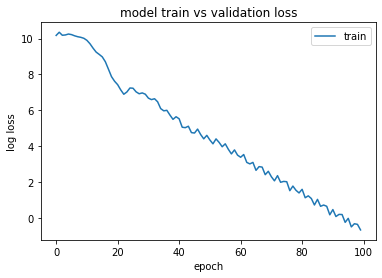

In [6]:
#plot our loss 
plt.plot(np.log(history.history['loss']))
#plt.plot(np.log(history.history['val_loss']))
plt.title('model train vs validation loss')
plt.ylabel('log loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#### Reconstruct Pavlos

In [7]:
### reconstruct pavlos
pavlos_flatten_reconstructed = autoencoder(pavlos_flatten.reshape(-1,input_dim)).numpy()
pavlos_reconstructed = pavlos_flatten_reconstructed.reshape(100,100)

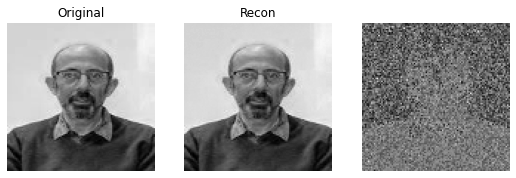

In [8]:
fig, ax = plt.subplots(1,3, figsize=(9,4))

ax[0].imshow(pavlos_img_nice.reshape(100,100), cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(pavlos_reconstructed, cmap='gray')
ax[1].set_title('Recon')
ax[1].axis('off')

ax[2].imshow(pavlos_img_nice.reshape(100,100) - pavlos_reconstructed, cmap='gray');
ax[2].axis('off');

#### Reconstruct Eagle

In [9]:
### Lets do the eagle
### reconstruct eagle
notpavlos_flatten_reconstructed = autoencoder(notpavlos_flatten.reshape(-1,10000)).numpy()
notpavlos_reconstructed = notpavlos_flatten_reconstructed.reshape(100,100)

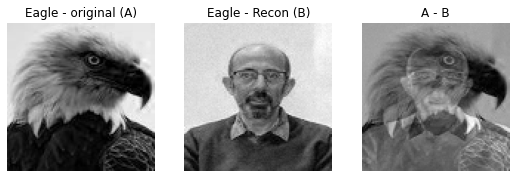

In [10]:
fig, ax = plt.subplots(1,3, figsize=(9,4))

ax[0].imshow(notpavlos_img_nice.reshape(100,100),cmap='gray')
ax[0].set_title('Eagle - original (A)')
ax[0].axis('off')

ax[1].imshow(notpavlos_reconstructed,cmap='gray')
ax[1].set_title('Eagle - Recon (B)')
ax[1].axis('off')

ax[2].imshow(notpavlos_img_nice.reshape(100,100) - notpavlos_reconstructed,cmap='gray')
ax[2].set_title('A - B')
ax[2].axis('off');


#### Reconstruct Not Pavlos i.e. Chris T.

In [11]:
### Lets do the not pavlos
### reconstruct not pavlos
notpavlos2_flatten_reconstructed = autoencoder(notpavlos2_flatten.reshape(-1,input_dim)).numpy()
notpavlos2_reconstructed = notpavlos2_flatten_reconstructed.reshape(100,100)

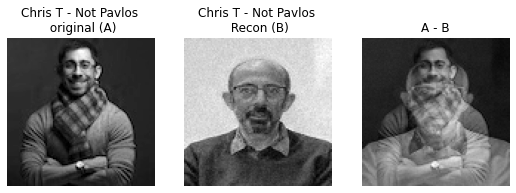

In [12]:
fig, ax = plt.subplots(1,3, figsize=(9,4))

ax[0].imshow(notpavlos2_img_nice.reshape(100,100),cmap='gray')
ax[0].set_title('Chris T - Not Pavlos \n original (A)')
ax[0].axis('off')

ax[1].imshow(notpavlos2_reconstructed,cmap='gray')
ax[1].set_title('Chris T - Not Pavlos \n Recon (B)')
ax[1].axis('off')

ax[2].imshow(notpavlos2_img_nice.reshape(100,100) - notpavlos_reconstructed,cmap='gray')
ax[2].set_title('A - B')
ax[2].axis('off');